In [2]:
import scanpy as sc
import pandas as pd
import numpy as np

# Quality control for count dataset

In [3]:
adata = sc.read_h5ad('scRNAseq_pancan_counts.h5ad')
adata

AnnData object with n_obs × n_vars = 1438413 × 14689
    obs: 'DataID', 'SampleID', 'Age', 'Sex', 'Treatment', 'Cancertype', 'Organ', 'tissue_type', 'celltype'

In [4]:
adata.layers['counts'] = adata.X.copy()

# MT

In [5]:
#Quality control
adata.var['mt'] = adata.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will 

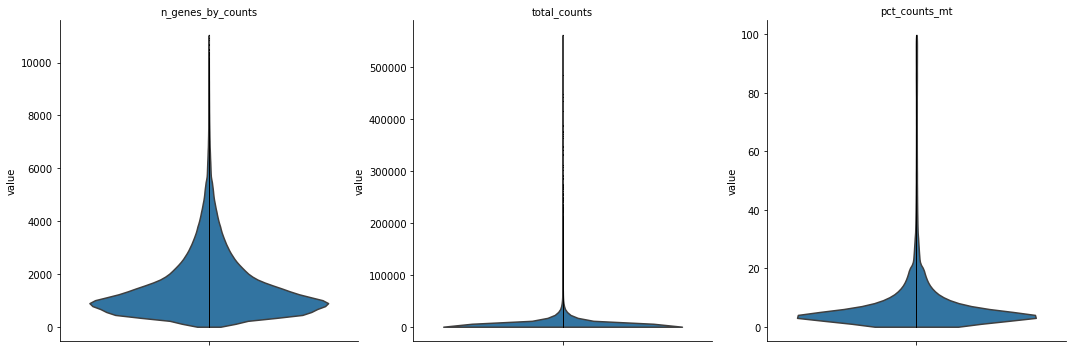

In [6]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0, multi_panel=True)

In [7]:
adata = adata[adata.obs['pct_counts_mt']<20,:].copy()
adata

AnnData object with n_obs × n_vars = 1339326 × 14689
    obs: 'DataID', 'SampleID', 'Age', 'Sex', 'Treatment', 'Cancertype', 'Organ', 'tissue_type', 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

# Total counts

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


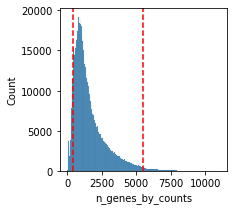

In [9]:
fig, ax = plt.subplots(figsize=(3, 3))
p3 = sns.histplot(adata.obs['n_genes_by_counts'], kde=False)
plt.axvline(x=400,linestyle='--',color='red')
plt.axvline(x=5500,linestyle='--',color='red')
plt.savefig('Extend_Fig3b_QC_n_genes_by_counts.pdf', dpi=300, bbox_inches='tight')

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


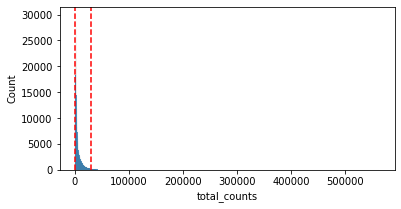

In [12]:
fig, ax = plt.subplots(figsize=(6, 3))
p3 = sns.histplot(adata.obs['total_counts'], kde=False)
plt.axvline(x=500,linestyle='--',color='red')
plt.axvline(x=30000,linestyle='--',color='red')

plt.savefig('Extend_Fig3b_QC_total_counts.pdf', dpi=300, bbox_inches='tight')

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


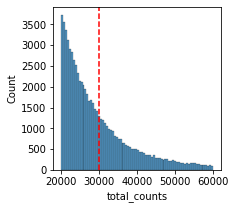

In [13]:
fig, ax = plt.subplots(figsize=(3, 3))
p3 = sns.histplot(adata.obs['total_counts'][(adata.obs['total_counts']>20000)&(adata.obs['total_counts']<60000)], kde=False)
plt.axvline(x=30000,linestyle='--',color='red')
plt.savefig('Extend_Fig3b_QC_total_counts_20000-60000.pdf', dpi=300, bbox_inches='tight')

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


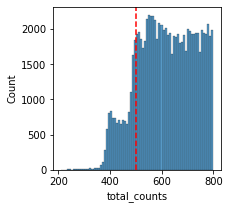

In [14]:
fig, ax = plt.subplots(figsize=(3, 3))
p3 = sns.histplot(adata.obs['total_counts'][adata.obs['total_counts']<800], kde=False)
plt.axvline(x=500,linestyle='--',color='red')
plt.savefig('Extend_Fig3b_QC_total_counts_0-800.pdf', dpi=300, bbox_inches='tight')

In [146]:
adata2 = adata[(adata.obs.n_genes_by_counts > 400)&(adata.obs.n_genes_by_counts < 5500), :].copy()
adata2 = adata2[(adata2.obs.total_counts > 500)&(adata2.obs.total_counts < 30000), :].copy()

adata2

AnnData object with n_obs × n_vars = 1226773 × 14689
    obs: 'DataID', 'SampleID', 'Age', 'Sex', 'Treatment', 'Cancertype', 'Organ', 'tissue_type', 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'DataSampleID'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

## Sample filtering

In [156]:
adata2.obs['DataSampleID'] = adata2.obs['DataID'].astype('str')+'_'+adata2.obs['SampleID'].astype('str')
samples_sel = cnt.loc[cnt['count']>200,:].index
adata2 = adata2[adata2.obs['DataSampleID'].isin(samples_sel),:].copy()
adata2

AnnData object with n_obs × n_vars = 1225232 × 14689
    obs: 'DataID', 'SampleID', 'Age', 'Sex', 'Treatment', 'Cancertype', 'Organ', 'tissue_type', 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'DataSampleID'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

# Save

In [160]:
adata2.write_h5ad('scRNAseq_pancan_counts_QC.h5ad')

## Normalization

In [161]:
#Normalization
sc.pp.normalize_total(adata2, target_sum=1e4)
sc.pp.log1p(adata2)

In [162]:
adata2.write_h5ad('scRNAseq_pancan_normalized.h5ad')

In [19]:
adata3.write_h5ad('refdata_data&code/'+file+'/'+file+'_5-20.h5ad')

# Combine with Normalized NPC dataset

In [9]:
import anndata as ad

In [21]:
adata3 = sc.read_h5ad('NPC_normalized.h5ad')
adata3 = adata3.concatenate(adata2)
adata3

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1823: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


AnnData object with n_obs × n_vars = 1273816 × 14090
    obs: 'SampleID', 'DataID', 'Age', 'Sex', 'Treatment', 'Organ', 'Cancertype', 'tissue_type', 'DataSampleID', 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'batch'
    var: 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1'

In [23]:
Ychrgenes1 = ['DDX3Y', 'UTY', 'KDM5D', 'USP9Y', 'ZFY', 'RPS4Y1', 'TMSB4Y', 'EIF1AY', 'NLGN4Y']
chk = [gene in adata3.var_names for gene in Ychrgenes1]
chk

[True, True, True, True, True, True, True, True, True]

In [24]:
adata3.raw = adata3

In [25]:
adata3.write_h5ad('scRNAseq_pancan_normalized.h5ad')

# Select tumor samples

In [27]:
adata3 = sc.read_h5ad('scRNAseq_pancan_normalized.h5ad')
adata3

AnnData object with n_obs × n_vars = 1273816 × 14090
    obs: 'SampleID', 'DataID', 'Age', 'Sex', 'Treatment', 'Organ', 'Cancertype', 'tissue_type', 'DataSampleID', 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'batch'
    var: 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1'

In [29]:
adata3 = adata3[adata3.obs['tissue_type']=='Tumor',:].copy()
adata3

AnnData object with n_obs × n_vars = 1030968 × 14090
    obs: 'SampleID', 'DataID', 'Age', 'Sex', 'Treatment', 'Organ', 'Cancertype', 'tissue_type', 'DataSampleID', 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'batch'
    var: 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1'

# SCVI

In [31]:
sc.pp.highly_variable_genes(adata3, flavor = 'seurat_v3', n_top_genes=2000,
                            subset = False, inplace=True)

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:61: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [32]:
import scvi
scvi.model.SCVI.setup_anndata(adata3,  batch_key='DataSampleID')
vae = scvi.model.SCVI(adata3)

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/abc.py:98: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
/home

In [33]:
vae.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/8:   0%|          | 0/8 [00:00<?, ?it/s]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/abc.py:98: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/8:  12%|█▎        | 1/8 [05:04<35:28, 304.11s/it, v_num=1, train_loss_step=4.12e+3, train_loss_epoch=4.36e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 8/8: 100%|██████████| 8/8 [40:25<00:00, 302.90s/it, v_num=1, train_loss_step=4.08e+3, train_loss_epoch=4.21e+3]

`Trainer.fit` stopped: `max_epochs=8` reached.


Epoch 8/8: 100%|██████████| 8/8 [40:25<00:00, 303.16s/it, v_num=1, train_loss_step=4.08e+3, train_loss_epoch=4.21e+3]


In [34]:
SCVI_LATENT_KEY = "X_scVI"
adata3.obsm[SCVI_LATENT_KEY] = vae.get_latent_representation(adata3)

In [35]:
sc.pp.neighbors(adata3, use_rep = SCVI_LATENT_KEY)
sc.tl.umap(adata3)

# SCANVI

In [43]:
adata3.obs['celltype'] = adata3.obs['celltype'].cat.add_categories('Unknown')
adata3.obs['celltype']= adata3.obs['celltype'].fillna('Unknown')
adata3.obs['celltype'].value_counts()

celltype
Unknown        594793
Epithelium     155922
Lymphocyte     120730
Myeloid         63308
Fibroblast      52896
Endothelium     31469
Plasma          11850
Name: count, dtype: int64

In [45]:
lvae = scvi.model.SCANVI.from_scvi_model(vae, adata = adata3, unlabeled_category = 'Unknown',
                                        labels_key = 'celltype')

lvae.train(max_epochs=20, n_samples_per_label=100)

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


INFO     Training for 20 epochs.                                                                                   


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/20:   0%|          | 0/20 [00:00<?, ?it/s]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_scanvae.py:286: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_scanvae.py:286: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 2/20:   5%|▌         | 1/20 [06:03<1:55:03, 363.33s/it, v_num=1, train_loss_step=4.31e+3, train_loss_epoch=4.27e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_scanvae.py:286: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -px.log_prob(x).sum(-1)


Epoch 20/20: 100%|██████████| 20/20 [1:55:54<00:00, 346.75s/it, v_num=1, train_loss_step=4.22e+3, train_loss_epoch=4.26e+3]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [1:55:54<00:00, 347.71s/it, v_num=1, train_loss_step=4.22e+3, train_loss_epoch=4.26e+3]


In [47]:
adata3.obs['Celltype1'] = lvae.predict(adata3)


In [49]:
adata3.write('scRNAseq_pancan_normalized_after_scanvi.h5ad')
